# DNM Drug Listings Analysis
### *Cybercrime and Fraud Detection a.y. 2023/2024*
### LUISS Guido Carli
## **Group Aho**

- Tommaso Agudio – 275041
- Eyad Ahmed – 
- Davide Beltrame – 268701
- Cédric Roger – 
- Tom Rummens – E00361

## 1. Introduction
See our report.

## 2. Data Preparation

### 2.1. Importing librairies and tools

In [198]:
# you might need to run the following lines
# pip install pandas
# pip install numpy
# pip install matplotlib
# pip install seaborn
# pip install scikit-learn
# pip install scipy
# pip install networkx
# pip install wordcloud
# pip install nltk

In [199]:
import pandas as pd # we will use this library to work with dataframes
import numpy as np # this one to work with arrays
import matplotlib.pyplot as plt # this one to plot data
import seaborn as sns # and this one to plot data in a fancier way
import os # this library provides a way to work with the operating system
import networkx as nx # this library will be used to work with networks
# librairies for text processing are imported later on, in section 4

### 2.2. Overview of the dataset

In [200]:
# Load the dataset
df = pd.read_csv('drug_listings.csv')

# Display the first 5 rows of the dataset
# display the full content of each coumn
pd.set_option('display.max_colwidth', None)
df.head()

,product_title,product_description,ship_from,ship_to,seller,price,source
0,10mg Diazepam Tabletten - 10 Stück,"- 10mg Diazepam Tabletten - 10 Stück\n\n- Diskreter Versand in neutralem Päckchen aus Deutschland.\n\n- Bitte achten Sie darauf immer die richtige Versandadresse anzugeben.\n\n- Anfragen und Bestellungen werden täglich ab 18.00 Uhr bearbeitet.\n\n- Der Versand erfolgt immer spätestens zwei Tage nach Geldeingang.\n\n*** Da ich ein gesichertes E-Mail Progamm habe können Sie mir Ihren Namen und Ihre Adresse einfach zukommen lassen***\n\n\nBitte schreiben Sie mir nach einer Bestellung keine PGP verschlüsselten Mails.\nMein Rechner / Server ist via TOR-Netzwerk und einer zusätzlichen VPN Verbindung gesichert sodass eine PGP Verschlüsselung nicht notwendig ist.\n\nWenn Sie eine Bestellung aufgeben, schreiben Sie mir bitte einfach eine Mail an 1776:\n\n\n... mit dem Inhalt:\n\n\n- Ihrem richtigen Namen\n- Ihrer Adesse\n\n\nWenn Sie Fragen haben, stellen Sie diese bitte immer dirket über 1776",Germany,Worldwide,1XAnOYMoUsX1BXx,$67.01,1776
1,10mg Diazepam Tabletten - 50 Stück,"10 mg Diazepam / Valium / Valocordin Tabletten je Packung 50 Stück\n\n\n\n- 1x Packung 50 Stück 10mg\n\n- Diskreter Versand in neutralem Päckchen aus Deutschland.\n\n- Bitte achten Sie darauf immer die richtige Versandadresse anzugeben.\n\n- Anfragen und Bestellungen werden täglich ab 18.00 Uhr bearbeitet.\n\n- Der Versand erfolgt immer spätestens zwei Tage nach Geldeingang.\n\n\n*** Da ich ein gesichertes E-Mail Progamm habe können Sie mir Ihren Namen und Ihre Adresse einfach zukommen lassen***\n\n\nBitte schreiben Sie mir nach einer Bestellung keine PGP verschlüsselten Mails.\nMein Rechner / Server ist via TOR-Netzwerk und einer zusätzlichen VPN Verbindung gesichert sodass eine PGP Verschlüsselung nicht notwendig ist.\n\nWenn Sie eine Bestellung aufgeben, schreiben Sie mir bitte einfach eine Mail an 1776:\n\n\n... mit dem Inhalt:\n\n\n- Ihrem richtigen Namen\n- Ihrer Adesse\n\n\nWenn Sie Fragen haben, stellen Sie diese bitte immer dirket über 1776",Germany,Worldwide,1XAnOYMoUsX1BXx,$93.82,1776
2,Sonderpreis !!! 10x Diazepam Tropfen 25ml,"Diazepam / Valium / Valocordin Tropfen je Flasche 25ml - 10mg/ml\n\n\n\n- Zehn Flaschen je 25ml\n\n- Diskreter Versand in neutralem Päckchen aus Deutschland.\n\n- Bitte achten Sie darauf immer die richtige Versandadresse anzugeben.\n\n- Anfragen und Bestellungen werden täglich ab 18.00 Uhr bearbeitet.\n\n- Der Versand erfolgt immer spätestens zwei Tage nach Geldeingang.\n\n\n*** Da ich ein gesichertes E-Mail Progamm habe können Sie mir Ihren Namen und Ihre Adresse einfach zukommen lassen***\n\n\nBitte schreiben Sie mir nach einer Bestellung keine PGP verschlüsselten Mails.\nMein Rechner / Server ist via TOR-Netzwerk und einer zusätzlichen VPN Verbindung gesichert sodass eine PGP Verschlüsselung nicht notwendig ist.\n\nWenn Sie eine Bestellung aufgeben, schreiben Sie mir bitte einfach eine Mail an 1776:\n\n\n... mit dem Inhalt:\n\n\n- Ihrem richtigen Namen\n- Ihrer Adesse\n\n\nWenn Sie Fragen haben, stellen Sie diese bitte immer dirket über 1776.\nSollte alles zu Ihrer Zufriedenheit abgelaufen sein freue ich mich auf eine positive Bewertung.",Germany,Worldwide,1XAnOYMoUsX1BXx,$938.32,1776
3,Sonderpreis !!! 2x Diazepam Tropfen 25ml,"Diazepam / Valium / Valocordin Tropfen je Flasche 25ml - 10mg/ml\n\n\n\n- Zwei Flaschen je 25ml\n\n- Diskreter Versand in neutralem Päckchen aus Deutschland.\n\n- Bitte achten Sie darauf immer die richtige Versandadresse anzugeben.\n\n- Anfragen und Bestellungen werden täglich ab 18.00 Uhr bearbeitet.\n\n- Der Versand erfolgt immer spätestens zwei Tage nach Geldeingang.\n\n\n*** Da ich ein gesichertes E-Mail Progamm habe können Sie mir Ihren Namen und Ihre Adresse einfach zukommen lassen***\n\n\nBitte schreiben Sie mir nach einer Bestellung keine PGP verschlüsselten Mails.\nMein Rechner / Server ist via TOR-Netzwerk und einer zusätzlichen VPN Verbindung gesichert sodass eine PGP Verschlüsselu

In [201]:
# Display the number of rows and columns in the dataset
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# Display the columns and data types of the columns
counter = 1
for i in df.columns:
    print(f"Column {counter} is {i} and its data type is {df[i].dtype}.")
    counter += 1

The dataset has 194433 rows and 7 columns.
Column 1 is product_title and its data type is object.
Column 2 is product_description and its data type is object.
Column 3 is ship_from and its data type is object.
Column 4 is ship_to and its data type is object.
Column 5 is seller and its data type is object.
Column 6 is price and its data type is object.
Column 7 is source and its data type is object.


In [202]:
# Display the summary statistics of the dataset
df.describe()

,product_title,product_description,ship_from,ship_to,seller,price,source
count,194427,180439,53229,63623,194303,193947,194433
unique,133798,129209,184,450,6191,148991,8
top,50x Grüne Herbalife,This shipment is with tracking number. The shipment must be signed to receive it.\nIn case that the track is stuck I offer 50% reship.,United States,Worldwide,rc4me,50 USD,agora
freq,181,241,11456,21273,1848,210,124842


In [203]:
# Display the percentage of data points of each column over the total number of rows
# the percentage of missing values and the percentage of unique values
for i in df.columns:
    print(f"{i} values over rows: {df[i].count()/df.shape[0]*100:.2f}%, missing values: {df[i].isnull().sum()/df.shape[0]*100:.2f}%, unique values: {df[i].nunique()/df.shape[0]*100:.2f}%") 

product_title values over rows: 100.00%, missing values: 0.00%, unique values: 68.81%
product_description values over rows: 92.80%, missing values: 7.20%, unique values: 66.45%
ship_from values over rows: 27.38%, missing values: 72.62%, unique values: 0.09%
ship_to values over rows: 32.72%, missing values: 67.28%, unique values: 0.23%
seller values over rows: 99.93%, missing values: 0.07%, unique values: 3.18%
price values over rows: 99.75%, missing values: 0.25%, unique values: 76.63%
source values over rows: 100.00%, missing values: 0.00%, unique values: 0.00%


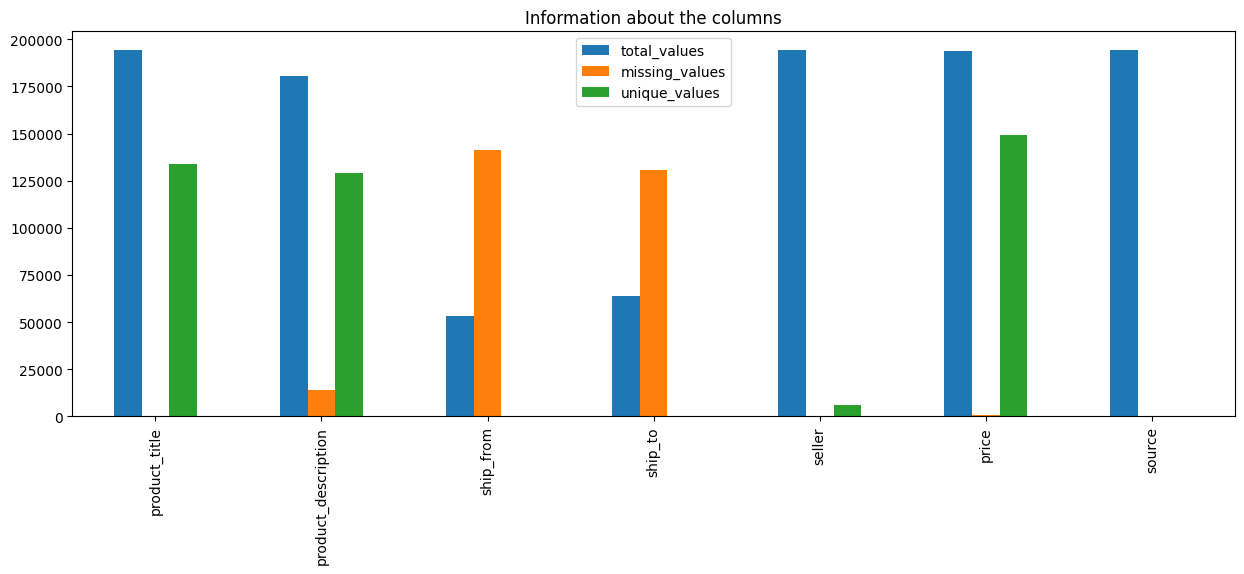

In [204]:
# bar plot that shows, for each column, the number of total nonmissing values, the number of missing values, and the number of unique values
total_values = df.count()
missing_values = df.isnull().sum()
unique_values = df.nunique()
df_info = pd.DataFrame({'total_values': total_values, 'missing_values': missing_values, 'unique_values': unique_values})
df_info.plot(kind='bar', figsize=(15, 5))
plt.title('Information about the columns')
plt.show()

### 2.3. Data Cleaning and Transformation

#### 2.3.1. Handling missing values and duplicates

In [205]:
# Display the percentage of missing values in each column
print((df.isnull().sum() / df.shape[0] * 100).round(2).astype(str) + '%')

# Remove missing values
df_wmv = df.dropna()

product_title            0.0%
product_description      7.2%
ship_from              72.62%
ship_to                67.28%
seller                  0.07%
price                   0.25%
source                   0.0%
dtype: object


In [206]:
# Display the percentage of unique values in each column
print((df_wmv.nunique() / df_wmv.shape[0] * 100).round(2).astype(str) + '%')

product_title          81.72%
product_description    75.62%
ship_from               0.33%
ship_to                 0.76%
seller                  7.45%
price                  72.88%
source                  0.01%
dtype: object


In [207]:
# Check for duplicate rows defined as rows with the same values in all columns
print(df_wmv.duplicated().sum())

# Create a new df without product_description column, as there could be products with the same values in all columns except product_description
df_wmv_nd = df_wmv.drop(columns=['product_description'])

# Check for duplicate rows defined as rows with the same values in all columns
print(df_wmv_nd.duplicated().sum())

# print their percentage over the total number of rows
print((df_wmv_nd.duplicated().sum() / df_wmv_nd.shape[0] * 100).round(2).astype(str) + '%')

# Print 2 rows which have the same values in all columns
df_wmv_nd[df_wmv_nd.duplicated(keep=False)].head(2)


0
167
0.34%


,product_title,ship_from,ship_to,seller,price,source
40,TRAMADOL 50 mg (20 capsules),Hungary,Worldwide,BruceWillix,$30.00,1776
41,TRAMADOL 50 mg (20 capsules),Hungary,Worldwide,BruceWillix,$30.00,1776


Duplicate rows as defined above are negligible.

#### 2.3.2. Fixing Prices

In [208]:
# suppressing FutureWarning
pd.options.mode.chained_assignment = None
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Convert all columns types to string
df_wmv = df.dropna()
df_wmv = df_wmv.drop_duplicates()
df_wmv = df_wmv.astype(str)

In [209]:
# We get the unique non-numerical characters in the price column
# Ensuring regex is explicitly enabled
non_numerical_chars = df_wmv['price'].str.replace(r'[0-9.]', '', regex=True).unique()
print(f'The non-numerical characters in the price column are: {non_numerical_chars}')
print()

# Print them in a list with their indexes
for i, char in enumerate(non_numerical_chars):
    print(f"Index {i}: {char}")


The non-numerical characters in the price column are: ['$' ' ฿(€)Original   €' ' ฿(A$)Original   A$' ' ฿($)Original   $'
 ' ฿(£)Original   £' ' ฿(C$)Original   C$' ' ฿'
 '~ ฿($)Original p\nrice:  $' ' BTC' 'BTC ' ' USD' ' USD - FE' '฿' '฿Inf']

Index 0: $
Index 1:  ฿(€)Original   €
Index 2:  ฿(A$)Original   A$
Index 3:  ฿($)Original   $
Index 4:  ฿(£)Original   £
Index 5:  ฿(C$)Original   C$
Index 6:  ฿
Index 7: ~ ฿($)Original p
rice:  $
Index 8:  BTC
Index 9: BTC 
Index 10:  USD
Index 11:  USD - FE
Index 12: ฿
Index 13: ฿Inf


In [210]:
# Remove these characters from the price column and add them to a new column: "currency_name"
df_wmv['currency_name'] = df_wmv['price'].str.replace(r'[0-9.]', '', regex=True)

# we print one instance of price for each currency_name
print(df_wmv.groupby('currency_name')['price'].first())

currency_name
 BTC                                                0.04133333 BTC
 USD                                                       120 USD
 USD - FE                                           59.83 USD - FE
 ฿                                                    0.76780000 ฿
 ฿($)Original   $                3.32543491 ฿($)Original  805.00 $
 ฿(A$)Original   A$             0.04694148 ฿(A$)Original  15.00 A$
 ฿(C$)Original   C$            0.51814044 ฿(C$)Original  150.00 C$
 ฿(£)Original   £                  0.04021557 ฿(£)Original  5.99 £
 ฿(€)Original   €                2.17267965 ฿(€)Original  476.00 €
$                                                           $67.01
BTC                                                     BTC 0.0466
~ ฿($)Original p\nrice:  $    ~0.319 ฿($)Original p\nrice: 73.00 $
฿                                                        ฿0.277792
฿Inf                                                          ฿Inf
Name: price, dtype: object


In [211]:
# Display them with their frequencies
print(df_wmv['price'].str.replace(r'[0-9.]', '', regex=True).value_counts())

price
฿                             24060
BTC                           15765
 USD                           2982
 BTC                           1716
 ฿($)Original   $              1528
 USD - FE                      1427
 ฿(€)Original   €               922
 ฿(£)Original   £               464
 ฿(A$)Original   A$             189
$                               172
 ฿                               61
 ฿(C$)Original   C$               4
~ ฿($)Original p\nrice:  $        2
฿Inf                              1
Name: count, dtype: int64


In [212]:
#displaying the frequency of prices
import pandas as pd

# Assuming df_wmv['price'] needs cleanup and display
# Clean up the price data by removing non-numeric characters
df_wmv['price_clean'] = df_wmv['price'].str.replace(r'[^0-9.]', '', regex=True)

# Convert cleaned price data to numeric
df_wmv['price_clean'] = pd.to_numeric(df_wmv['price_clean'], errors='coerce')

# Now display with value_counts in a nicer format using to_frame() and reset_index()
price_counts = df_wmv['price_clean'].value_counts().reset_index()
price_counts.columns = ['Price', 'Frequency']  # Renaming columns for clarity

# Format the price column to show as fixed decimals
price_counts['Price'] = price_counts['Price'].map('{:.2f}'.format)

# Print the data in a tabular format
print(price_counts.to_string(index=False))

                Price  Frequency
                 0.00        268
                50.00         62
               100.00         59
                40.00         55
                60.00         53
                25.00         53
                10.00         45
                20.00         44
               200.00         43
                30.00         42
                15.00         41
                35.00         37
                70.00         36
                 0.15         36
                65.00         35
                45.00         34
                59.83         33
                90.00         33
                 1.00         32
                75.00         31
               125.00         28
                80.00         28
                 0.53         27
                55.00         27
                 5.00         26
               120.00         26
                 0.21         26
                 0.10         26
               500.00         23
          

In [213]:
# display their percentage over the total number of rows
print((df_wmv['price'].str.replace(r'[0-9.]', '', regex=True).value_counts() / df_wmv.shape[0] * 100).round(2).astype(str) + '%')

price
฿                             48.81%
BTC                           31.98%
 USD                           6.05%
 BTC                           3.48%
 ฿($)Original   $               3.1%
 USD - FE                      2.89%
 ฿(€)Original   €              1.87%
 ฿(£)Original   £              0.94%
 ฿(A$)Original   A$            0.38%
$                              0.35%
 ฿                             0.12%
 ฿(C$)Original   C$            0.01%
~ ฿($)Original p\nrice:  $      0.0%
฿Inf                            0.0%
Name: count, dtype: object


In [214]:
# we drop the row that contains non_numerical_chars[-1]
df_wmv = df_wmv[df_wmv['currency_name'] != non_numerical_chars[-1]]

# we drop the rows that contain items of non_numerical_chars that contains the euro sign
# and also the pound sign, the string "A$" and the string "C$"
# which are non_numerical_chars[1], non_numerical_chars[2] and non_numerical_chars[4] and non_numerical_chars[5]
df_wmv = df_wmv[~df_wmv['currency_name'].isin([non_numerical_chars[1], non_numerical_chars[2], non_numerical_chars[4], non_numerical_chars[5]])]

print(df_wmv['price'].str.replace(r'[0-9.]', '',regex = True).value_counts())

price
฿                             24060
BTC                           15765
 USD                           2982
 BTC                           1716
 ฿($)Original   $              1528
 USD - FE                      1427
$                               172
 ฿                               61
~ ฿($)Original p\nrice:  $        2
Name: count, dtype: int64


##### Creating subset of USD prices

In [215]:
# we create a subset for prices in BTC and one for prices in USD
df_usd = df_wmv[df_wmv['currency_name'].isin([non_numerical_chars[0], non_numerical_chars[3], non_numerical_chars[7], non_numerical_chars[10], non_numerical_chars[11]])]
print(df_usd['price'].str.replace(r'[0-9.]', '', regex=True).value_counts())
print()

# print only one instance of a price for every currency_name in USD
print(df_usd.groupby('currency_name')['price'].first())
print()

# for prices that have currency_name as non_numerical_chars[3] or non_numerical_chars[11],
# we split the value of the price column in a list by the spaces, and get the penultimate element as the price converted to float
df_usd1 = df_usd[df_usd['currency_name'].isin([non_numerical_chars[3], non_numerical_chars[7]])]
df_usd1['price'] = df_usd1['price'].str.split().apply(lambda x: float(x[-2]) if len(x) > 1 else x[0])

# for prices that have currency_name as non_numerical_chars[10] or non_numerical_chars[11],
# we split the value of the price column in a list by the spaces, and get the first element as the price converted to float
df_usd2 = df_usd[df_usd['currency_name'].isin([non_numerical_chars[10], non_numerical_chars[11]])]
df_usd2['price'] = df_usd2['price'].str.split().apply(lambda x: float(x[0]))

# for prices that have currency_name as non_numerical_chars[0]
# we remove the non-numerical characters and convert the price to float
df_usd3 = df_usd[df_usd['currency_name'] == non_numerical_chars[0]]
df_usd3['price'] = df_usd3['price'].str.replace(r'[^\d.]', '',regex = True).astype(float)

# merge all three subsets and assign currency name as USD
df_usd = pd.concat([df_usd1, df_usd2, df_usd3])
df_usd['currency_name'] = 'USD'

price
 USD                          2982
 ฿($)Original   $             1528
 USD - FE                     1427
$                              172
~ ฿($)Original p\nrice:  $       2
Name: count, dtype: int64

currency_name
 USD                                                       120 USD
 USD - FE                                           59.83 USD - FE
 ฿($)Original   $                3.32543491 ฿($)Original  805.00 $
$                                                           $67.01
~ ฿($)Original p\nrice:  $    ~0.319 ฿($)Original p\nrice: 73.00 $
Name: price, dtype: object



In [216]:
# check if all prices in df_usd are numerical
if df_usd['price'].apply(lambda x: isinstance(x, (int, float))).all():
    print("All prices in df_usd are numerical.")

# check if all prices in df_usd are positive
if (df_usd['price'] > 0).all():
    print("All prices in df_usd are positive.")

# count and drop rows with negative prices or equal to zero
print(df_usd['price'].le(0).sum())
df_usd = df_usd[df_usd['price'] > 0]

All prices in df_usd are numerical.
30


##### Creating subset of BTC prices

In [217]:
# we create a subset for prices in BTC
df_btc = df_wmv[df_wmv['currency_name'].isin([non_numerical_chars[6], non_numerical_chars[8], non_numerical_chars[9], non_numerical_chars[12]])]
print(df_btc['price'].str.replace(r'[0-9.]', '', regex = True).value_counts())
print()

# for prices that have currency_name as non_numerical_chars[6] or non_numerical_chars[8],
# we split the value of the price column in a list by the spaces, and get the penultimate element as the price converted to float
df_btc1 = df_btc[df_btc['currency_name'].isin([non_numerical_chars[6], non_numerical_chars[8]])]
df_btc1['price'] = df_btc1['price'].str.split().apply(lambda x: float(x[-2]) if len(x) > 1 else x[0])

# for prices that have currency_name as non_numerical_chars[9],
# we split the value of the price column in a list by the spaces, and get the second element as the price converted to float
df_btc2 = df_btc[df_btc['currency_name'] == non_numerical_chars[9]]
df_btc2['price'] = df_btc2['price'].str.split().apply(lambda x: float(x[1]))

# for prices that have currency_name as non_numerical_chars[12],
# we take as price the price value minus the first character
df_btc3 = df_btc[df_btc['currency_name'] == non_numerical_chars[12]]
df_btc3['price'] = df_btc3['price'].str[1:].astype(float)

# merge all three subsets and assign currency name as BTC
df_btc = pd.concat([df_btc1, df_btc2, df_btc3])
df_btc['currency_name'] = 'BTC'

price
฿       24060
BTC     15765
 BTC     1716
 ฿         61
Name: count, dtype: int64



In [218]:
# check if all prices in df_btc are numerical
if df_btc['price'].apply(lambda x: isinstance(x, (int, float))).all():
    print('All prices in df_btc are numerical')


# check if all prices in df_btc are positive
if (df_btc['price'] > 0).all():
    print('All prices in df_btc are positive')

# count and drop rows with negative prices or equal to zero
print(df_btc['price'].le(0).sum())
df_btc = df_btc[df_btc['price'] > 0]

All prices in df_btc are numerical
238


## 3. Exploratory Data Analysis

### 3.1. Numerical Data

#### 3.1.1. USD prices

In [219]:
df_usd.head()

,product_title,product_description,ship_from,ship_to,seller,price,source,currency_name,price_clean
193,1 Free Gram for every 5 you order. 28g OG KUSH HONEYCOMB,New Vendor Free Shipping Promo available for a limited time.\n1 Free Gram for every 5 you order.\n\nMade from Top Tier Indoor Organic Sugar Shake and Trim. Vaccum purged for over 48 hours and Air Purged for no less than 1 week before being considered for shipment. This product is great for dabbing and miking edibles. The smoke is very smooth. The high starts off extremely cerebral and finishes with a relaxing couchy feel. Try us out and see fro yourself why we are the best.,Unknown,USA ONLY,AmonBlack,805.0,abraxas,USD,NaN
194,1 Free Gram for every 5 you order. 28g ORIGINAL OG KUSH BUDDER,New Vendor Free Shipping Promo available for a limited time.\n1 Free Gram for every 5 you order.\n\nMade from Top Tier Indoor Organic Sugar Shake and Trim. Vaccum purged for over 48 hours and Air Purged for no less than 1 week before being considered for shipment. This product is great for dabbing and miking edibles. The smoke is very smooth. The high starts off extremely cerebral and finishes with a relaxing couchy feel. Try us out and see fro yourself why we are the best.,Unknown,USA ONLY,AmonBlack,720.0,abraxas,USD,NaN
195,1 Free Gram for every 5 you order. 7g ORIGINAL OG KUSH BUDDER,New Vendor Free Shipping Promo available for a limited time.\n1 Free Gram for every 5 you order.\n\nMade from Top Tier Indoor Organic Sugar Shake and Trim. Vaccum purged for over 48 hours and Air Purged for no less than 1 week before being considered for shipment. This product is great for dabbing and miking edibles. The smoke is very smooth. The high starts off extremely cerebral and finishes with a relaxing couchy feel. Try us out and see fro yourself why we are the best.,Unknown,USA ONLY,AmonBlack,210.0,abraxas,USD,NaN
196,1 Free Gram for every 5 you order.14g OG KUSH HONEYCOMB,New Vendor Free Shipping Promo available for a limited time.\n1 Free Gram for every 5 you order.\n\nMade from Top Tier Indoor Organic Sugar Shake and Trim. Vaccum purged for over 48 hours and Air Purged for no less than 1 week before being considered for shipment. This product is great for dabbing and miking edibles. The smoke is very smooth. The high starts off extremely cerebral and finishes with a relaxing couchy feel. Try us out and see fro yourself why we are the best.,Unknown,USA ONLY,AmonBlack,425.0,abraxas,USD,NaN
197,1 Free Gram for every 5 you order.14g ORIGINAL OG KUSH BUDDER,New Vendor Free Shipping Promo available for a limited time.\n1 Free Gram for every 5 you order.\n\nMade from Top Tier Indoor Organic Sugar Shake and Trim. Vaccum purged for over 48 hours and Air Purged for no less than 1 week before being considered for shipment. This product is great for dabbing and miking edibles. The smoke is very smooth. The high starts off extremely cerebral and finishes with a relaxing couchy feel. Try us out and see fro yourself why we are the best.,Unknown,USA ONLY,AmonBlack,375.0,abraxas,USD,NaN


In [220]:
# print the main statistics of the price column
print(df_usd['price'].describe().round(3))

count     6081.000
mean       405.366
std       2392.157
min          0.010
25%         37.400
50%         90.000
75%        245.190
max      99999.000
Name: price, dtype: float64


The mean is much higher than the median and the std is very high, which suggests the presence of outliers.

Text(0.5, 1.0, 'Boxplot of raw prices in USD')

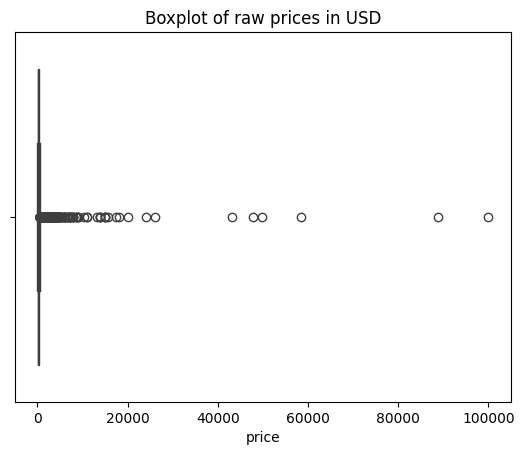

In [221]:
# We check for outliers in the price column
sns.boxplot(x=df_usd['price'])
plt.title('Boxplot of raw prices in USD')

count    5577.00
mean      145.91
std       174.29
min         0.01
25%        34.13
50%        75.78
75%       183.14
max       860.99
Name: price, dtype: float64
75.78


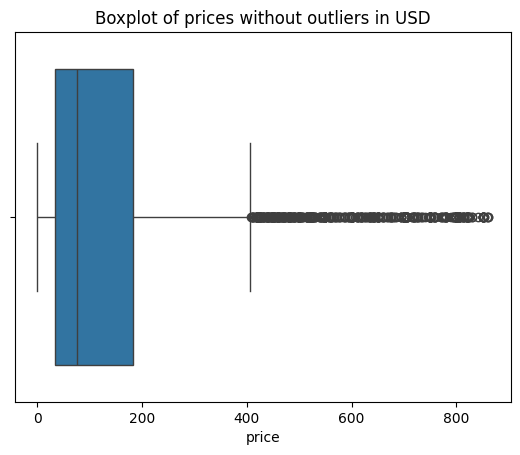

In [222]:
# we remove outlier as values greater than 3xiqr
q1 = df_usd['price'].quantile(0.25)
q3 = df_usd['price'].quantile(0.75)
iqr = q3 - q1
df_usd = df_usd[(df_usd['price'] >= q1 - 3 * iqr) & (df_usd['price'] <= q3 + 3 * iqr)]

# we plot the boxplot again
sns.boxplot(x=df_usd['price'])
plt.title('Boxplot of prices without outliers in USD')

# and the main statistics of the price column, including the median
print(df_usd['price'].describe().round(2))
print(df_usd['price'].median().round(2))

Text(0.5, 1.0, 'Distribution of prices in USD')

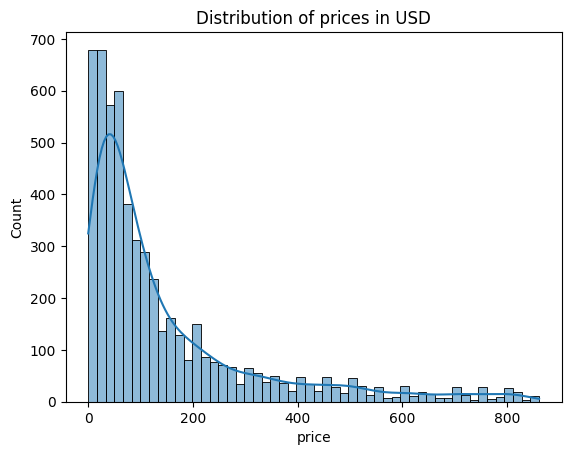

In [223]:
# we plot the distribution of the price column
sns.histplot(df_usd['price'], kde=True)
plt.title('Distribution of prices in USD')

#### 3.1.2. BTC prices

In [224]:
df_btc.head()

,product_title,product_description,ship_from,ship_to,seller,price,source,currency_name,price_clean
1586,100GRAM69-73%SPEEDPASTE(VERY GOOD QUALITY),"Hi I am new here on abraxas and i am offering one of the best Speed Paste you can get your hands on. Not only do i offer a unique and very good quality but my pricing also differs from the other sellers \n\nWhat im offering : \n100 Grams of 69-73% Dutch Quality Speed Paste \n\n·About the shipment: \n\nWe do ship worldwide \nMylar and Vacuum packing ensure the isolation of the product from the environment \nAn outstanding stealthy methode is used \ndont worry be happy \n\nSpeed Paste is a wet product so it loses weight after drying. This is not regular speed but speed paste straight from the lab, Know what you are buying! \n\nNote: I am full with suprises, because I'm still a rookie here so please do give me a try:) Satisfaction Guarenteed! F**k Sonic The Hedgehog this is what I call SPEED \n\nNote: I DO NOT SHIP TO USA CANADA OR AUSTRALIA. Sorry about that.",Netherlands,Worldwide,Neroburnscities,0.7678,abraxas,BTC,0.7678
1587,15 GRAMs69-73% SPEEDPASTE( GOOD QUALITY),"Hi I am new here on abraxas and i am offering one of the best Speed Paste you can get your hands on. Not only do i offer a unique and very good quality but my pricing also differs from the other sellers \n\nWhat im offering : \n14.5 Grams of 69-73% Dutch Quality Speed Paste \n\n·About the shipment: \n\nWe do ship worldwide \nMylar and Vacuum packing ensure the isolation of the product from the environment \nAn outstanding stealthy methode is used \ndont worry be happy \n\nSpeed Paste is a wet product so it loses weight after drying. This is not regular speed but speed paste straight from the lab, Know what you are buying! \n\nNote: I am full with suprises, because I'm still a rookie here so please do give me a try:) Satisfaction Guarenteed! F**k Sonic The Hedgehog this is what I call SPEED \n\nNote: I DO NOT SHIP TO USA CANADA OR AUSTRALIA. Sorry about that.",Netherlands,Worldwide,Neroburnscities,0.1500,abraxas,BTC,0.1500
1588,1GRAM OF HIGHGRADE FLAKESCOCAINE 87%-92%,"Dear abraxas users I am here to let it snow again, but this time with some amazing cocaine. This amazing quality cocaine has it all, superb quality, a great taste and all that for a good price \n\nThe stealth method used with this product is a very good. \nA successful delivery rate is guaranteed. \n\nI DO NOT SHIP TO THE US,CANADA, SCANDINAVIANS OR AUSTRALIA",Worldwide,Worldwide,Neroburnscities,0.2532,abraxas,BTC,0.2532
1590,20 GRAMs69-73% SPEEDPASTE(VERY GOOD QUALITY),"Hi I am new here on abraxas and i am offering one of the best Speed Paste you can get your hands on. Not only do i offer a unique and very good quality but my pricing also differs from the other sellers \n\nWhat im offering : \n20 Grams of 69-73% Dutch Quality Speed Paste \n\n·About the shipment: \n\nWe do ship worldwide \nMylar and Vacuum packing ensure the isolation of the product from the environment \nAn outstanding stealthy methode is used \ndont worry be happy \n\nSpeed Paste is a wet product so it loses weight after drying. This is not regular speed but speed paste straight from the lab, Know what you are buying! \n\nNote: I am full with suprises, because I'm still a rookie here so please do give me a try:) Satisfaction Guarenteed! F**k Sonic The Hedgehog this is what I call SPEED \n\nNote: I DO NOT SHIP TO USA CANADA OR AUSTRALIA. Sorry about that.",Netherlands,Worldwide,Neroburnscities,0.2140,abraxas,BTC,0.2140
1591,5 GRAM 69-73%SPEEDPASTE(GOOD QUALITY),"Hi I am new here on abraxas and i am offering one of the best Speed Paste you can get your hands on. Not only do i offer a unique and very good quality but my pricing also differs from the other sellers \n\nWhat im offering : \n5 Grams of 69-73% Dutch Quality Speed Paste \n\n·About the shipment: \n\nWe do ship worldwide \nMylar and Vacuum packing ensure the isolation of the product from the environment \nAn outstanding stealthy m

In [225]:
# print the main statistics of the price column
print(df_btc['price'].describe().round(4))

# and the median
print(df_btc['price'].median().round(4))

count    4.136400e+04
mean     2.524875e+13
std      4.156460e+15
min      0.000000e+00
25%      8.990000e-02
50%      2.321000e-01
75%      7.515000e-01
max      8.383431e+17
Name: price, dtype: float64
0.2321


The mean is much lower than the median, which suggests the presence of outliers.

184631    8.383431e+17
179736    7.032315e+16
184646    6.644682e+16
184729    4.495463e+16
184707    2.005497e+16
              ...     
177545    1.050000e+04
172118    9.870305e+03
184614    9.247976e+03
192536    8.243861e+03
171099    8.223034e+03
Name: price, Length: 100, dtype: float64


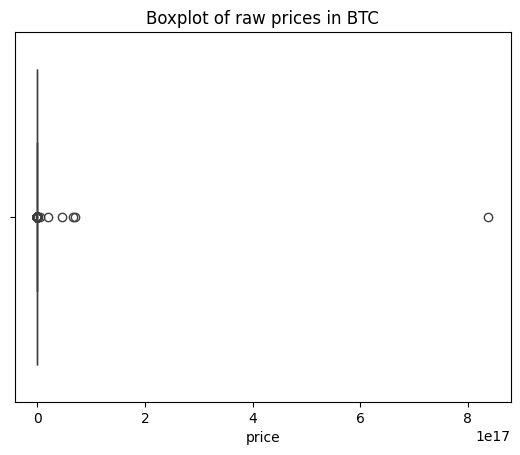

In [226]:
# We check for outliers in the price column
sns.boxplot(x=df_btc['price'])
plt.title('Boxplot of raw prices in BTC')

# and we print the 50 highest prices, just the values of the price column
print(df_btc['price'].nlargest(100))

count    36315.000000
mean         0.354923
std          0.416699
min          0.000016
25%          0.079400
50%          0.184100
75%          0.459493
max          2.000000
Name: price, dtype: float64
0.1841


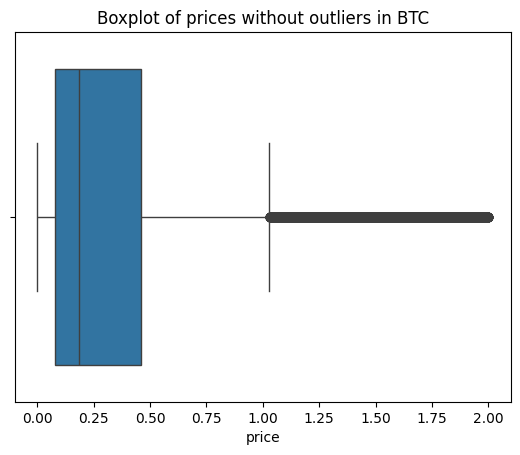

In [227]:
# we remove outlier as values greater than 2
df_btc = df_btc[df_btc['price'] <= 2]

# we plot the boxplot again
sns.boxplot(x=df_btc['price'])
plt.title('Boxplot of prices without outliers in BTC')

# and the main statistics of the price column, including the median
print(df_btc['price'].describe())
print(df_btc['price'].median())

Text(0.5, 1.0, 'Distribution of prices in BTC')

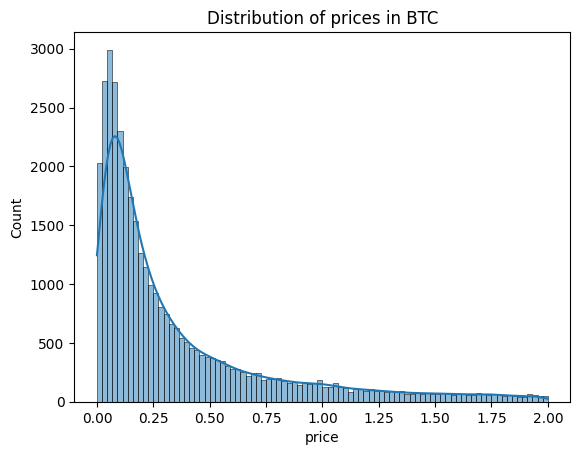

In [228]:
# we plot the distribution of the price column
sns.histplot(df_btc['price'], kde=True)
plt.title('Distribution of prices in BTC')

count    41892.000000
mean         0.346522
std          0.408846
min          0.000016
25%          0.077800
50%          0.180000
75%          0.446123
max          2.000000
Name: price, dtype: float64
0.18


<Axes: xlabel='price', ylabel='Count'>

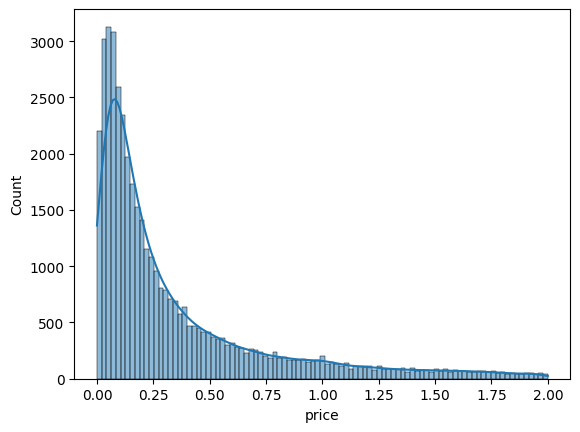

In [229]:
# we merge the two dataframes
df_final = pd.concat([df_usd, df_btc])

# we need to convert the prices that have USD as currency_name to BTC and convert their prices
# we use the conversion rate of 1 BTC = 500 USD

# we convert the prices that have USD as currency_name to BTC
df_final.loc[df_final['currency_name'] == 'USD', 'price'] = df_final['price'] / 500

# we convert the currency_name to BTC
df_final.loc[df_final['currency_name'] == 'USD', 'currency_name'] = 'BTC'

# and the main statistics of the price column, including the median
print(df_final['price'].describe())

# and the median
print(df_final['price'].median())

# we plot the distribution of the price column
sns.histplot(df_final['price'], kde=True)

count    41867.000000
mean         0.346729
std          0.408880
min          0.000100
25%          0.077900
50%          0.180000
75%          0.446639
max          2.000000
Name: price, dtype: float64
0.18


Text(0.5, 1.0, 'Distribution of all prices')

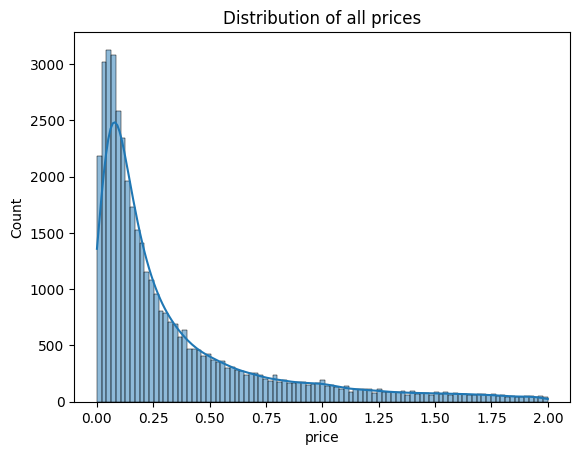

In [230]:
# we drop all prices under 2*10**-4 BTC, corresponding to 10 USD cents
df_final = df_final[df_final['price'] >= 10**-4]

# and the main statistics of the price column, including the median
print(df_final['price'].describe())

# and the median
print(df_final['price'].median())

# we plot the distribution of the price column
sns.histplot(df_final['price'], kde=True)
plt.title('Distribution of all prices')

In [231]:
df_final.head()

,product_title,product_description,ship_from,ship_to,seller,price,source,currency_name,price_clean
193,1 Free Gram for every 5 you order. 28g OG KUSH HONEYCOMB,New Vendor Free Shipping Promo available for a limited time.\n1 Free Gram for every 5 you order.\n\nMade from Top Tier Indoor Organic Sugar Shake and Trim. Vaccum purged for over 48 hours and Air Purged for no less than 1 week before being considered for shipment. This product is great for dabbing and miking edibles. The smoke is very smooth. The high starts off extremely cerebral and finishes with a relaxing couchy feel. Try us out and see fro yourself why we are the best.,Unknown,USA ONLY,AmonBlack,1.61,abraxas,BTC,NaN
194,1 Free Gram for every 5 you order. 28g ORIGINAL OG KUSH BUDDER,New Vendor Free Shipping Promo available for a limited time.\n1 Free Gram for every 5 you order.\n\nMade from Top Tier Indoor Organic Sugar Shake and Trim. Vaccum purged for over 48 hours and Air Purged for no less than 1 week before being considered for shipment. This product is great for dabbing and miking edibles. The smoke is very smooth. The high starts off extremely cerebral and finishes with a relaxing couchy feel. Try us out and see fro yourself why we are the best.,Unknown,USA ONLY,AmonBlack,1.44,abraxas,BTC,NaN
195,1 Free Gram for every 5 you order. 7g ORIGINAL OG KUSH BUDDER,New Vendor Free Shipping Promo available for a limited time.\n1 Free Gram for every 5 you order.\n\nMade from Top Tier Indoor Organic Sugar Shake and Trim. Vaccum purged for over 48 hours and Air Purged for no less than 1 week before being considered for shipment. This product is great for dabbing and miking edibles. The smoke is very smooth. The high starts off extremely cerebral and finishes with a relaxing couchy feel. Try us out and see fro yourself why we are the best.,Unknown,USA ONLY,AmonBlack,0.42,abraxas,BTC,NaN
196,1 Free Gram for every 5 you order.14g OG KUSH HONEYCOMB,New Vendor Free Shipping Promo available for a limited time.\n1 Free Gram for every 5 you order.\n\nMade from Top Tier Indoor Organic Sugar Shake and Trim. Vaccum purged for over 48 hours and Air Purged for no less than 1 week before being considered for shipment. This product is great for dabbing and miking edibles. The smoke is very smooth. The high starts off extremely cerebral and finishes with a relaxing couchy feel. Try us out and see fro yourself why we are the best.,Unknown,USA ONLY,AmonBlack,0.85,abraxas,BTC,NaN
197,1 Free Gram for every 5 you order.14g ORIGINAL OG KUSH BUDDER,New Vendor Free Shipping Promo available for a limited time.\n1 Free Gram for every 5 you order.\n\nMade from Top Tier Indoor Organic Sugar Shake and Trim. Vaccum purged for over 48 hours and Air Purged for no less than 1 week before being considered for shipment. This product is great for dabbing and miking edibles. The smoke is very smooth. The high starts off extremely cerebral and finishes with a relaxing couchy feel. Try us out and see fro yourself why we are the best.,Unknown,USA ONLY,AmonBlack,0.75,abraxas,BTC,NaN


### 3.2. Categorical Data

#### 3.2.1. Drug types

In [232]:
# we use the following dictionary to find corresponding drugs in product_title and product_description
drug_synonyms = {
    'cannabis': ['marijuana', 'weed', 'pot', 'ganja', 'herb', 'grass', 'mary jane', 'dope', 'bud', 'reefer', 'hash', 'hashish', 'joint', 'blunt', 'spliff', 'chronic', 'dank'],
    'ecstasy': ['MDMA', 'molly', 'E', 'X', 'XTC', 'Adam', 'hug drug', 'love drug', 'beans', 'rolls', 'scooby snacks'],
    'stimulants': ['amphetamines', 'speed', 'uppers', 'adderall', 'dexies', 'bennies', 'black beauties', 'coke'],
    'psychedelics': ['LSD', 'acid', 'magic mushrooms', 'shrooms', 'psilocybin', 'DMT', 'ayahuasca', 'mescaline', 'peyote'],
    'benzes': ['Xanax', 'Valium', 'Ativan', 'Klonopin', 'roofies'],
    'prescription': ['Rx drugs', 'meds', 'pharmaceuticals', 'pills', 'tablets', 'capsules'],
    'opioids': ['heroin', 'OxyContin', 'oxycodone', 'percocet', 'vicodin', 'hydrocodone', 'codeine', 'morphine', 'fentanyl', 'tramadol'],
    'steroids': ['anabolic steroids', 'juice', 'roids', 'gear', 'pumpers'],
    'dissociative': ['ketamine', 'special K', 'K', 'vitamin K', 'DXM', 'PCP', 'angel dust'],
    'paraphernalia': ['gear', 'equipment', 'tools', 'supplies', 'kits', 'accessories'],
    'weight loss': ['diet pills', 'slimming pills', 'fat burners', 'appetite suppressants'],
    'tobacco': ['cigarettes', 'cigs', 'smokes', 'cancer sticks', 'nicotine'],
    'cocaine': ['coke', 'blow', 'snow', 'powder', 'white', 'yayo', 'charlie', 'nose candy'],
    'heroin': ['smack', 'junk', 'horse', 'H', 'dope', 'brown', 'tar', 'china white', 'skag'],
    'meth': ['methamphetamine', 'crystal meth', 'ice', 'crystal', 'glass', 'tina', 'bath salts', 'spice', 'K2']
}

# we create a new column called "drug_category" and assign the value "others" to it
df_wmv['drug_type'] = 'others'

# we iterate over the dictionary and assign the key to the rows that contain the corresponding values in product_title and product_description
for drug, synonyms in drug_synonyms.items():
    df_wmv.loc[df_wmv['product_title'].str.contains('|'.join(synonyms), case=False), 'drug_type'] = drug
    df_wmv.loc[df_wmv['product_description'].str.contains('|'.join(synonyms), case=False), 'drug_type'] = drug

# we print the number of rows for each drug category
print(df_wmv['drug_type'].value_counts())

drug_type
heroin           25330
meth             20760
ecstasy            580
dissociative       551
prescription       110
benzes              90
others              76
cocaine             61
opioids             60
psychedelics        52
stimulants          41
paraphernalia        1
tobacco              1
Name: count, dtype: int64


Text(0.5, 1.0, 'Number of rows for each drug type')

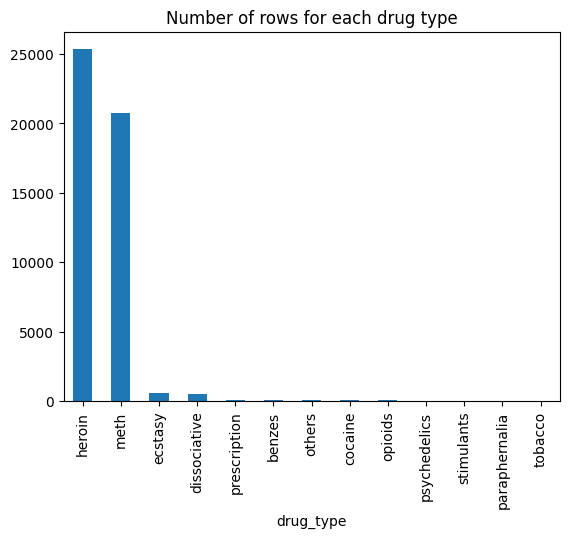

In [233]:
# we plot the number of rows for each drug category
df_wmv['drug_type'].value_counts().plot(kind='bar')
plt.title('Number of rows for each drug type')


#### 3.2.2. Drug types prices

In [234]:
# we do the same for the df_final dataframe

# we create a new column called "drug_category" and assign the value "others" to it
df_final['drug_type'] = 'others'

# we iterate over the dictionary and assign the key to the rows that contain the corresponding values in product_title and product_description
for drug, synonyms in drug_synonyms.items():
    df_final.loc[df_final['product_title'].str.contains('|'.join(synonyms), case=False), 'drug_type'] = drug
    df_final.loc[df_final['product_description'].str.contains('|'.join(synonyms), case=False), 'drug_type'] = drug

# we print the number of rows for each drug category
print(df_final['drug_type'].value_counts())


drug_type
heroin           22266
meth             18176
ecstasy            510
dissociative       486
prescription       107
benzes              83
others              62
opioids             51
psychedelics        49
cocaine             42
stimulants          33
paraphernalia        1
tobacco              1
Name: count, dtype: int64


In [235]:
# we check the average and median price for each drug category
# and print them in descending order
df_final.groupby('drug_type')['price'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)


,mean,median
drug_type,,
others,0.520044,0.436663
cocaine,0.476833,0.176550
opioids,0.426388,0.266667
stimulants,0.380245,0.235048
meth,0.362473,0.195292
paraphernalia,0.352519,0.352519
prescription,0.340412,0.236511
dissociative,0.337632,0.167141
heroin,0.334316,0.170000


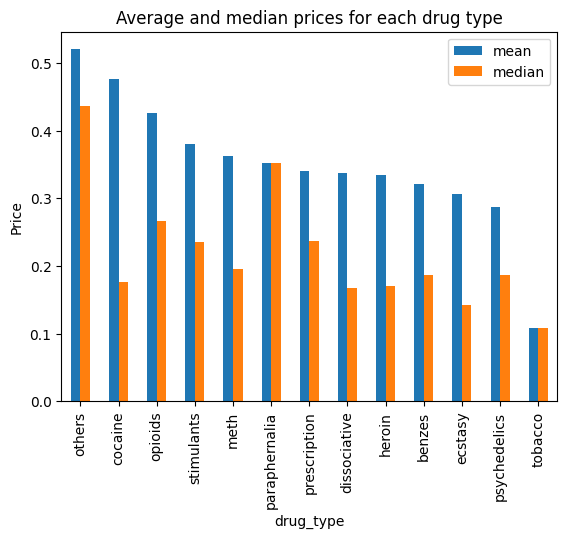

In [236]:
# let's plot the averages and medians
df_final.groupby('drug_type')['price'].agg(['mean', 'median']).sort_values(by='mean', ascending=False).plot(kind='bar')
plt.title('Average and median prices for each drug type')
plt.ylabel('Price')
plt.show()

#### 3.2.3. Marketplaces

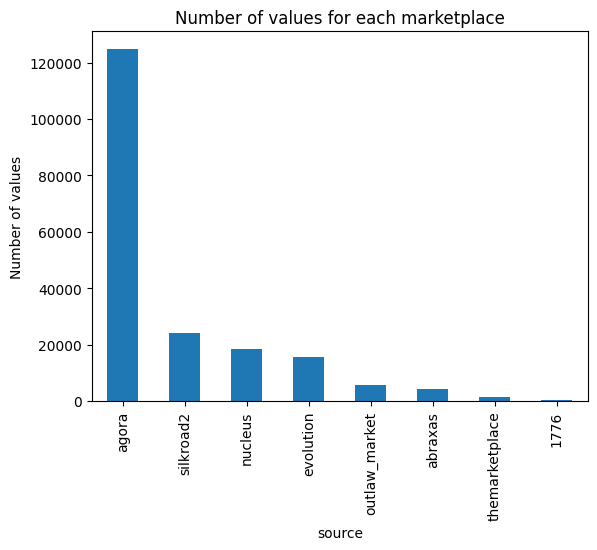

In [237]:
# we not explore the column source
# we plot the number of values for each unique value in the source column
df['source'].value_counts().plot(kind='bar')
plt.title('Number of values for each marketplace')
plt.ylabel('Number of values')
plt.show()

In [238]:
# let's print what we just plotted
print(df['source'].value_counts())

# and we print the total
print(df['source'].value_counts().sum())


source
agora             124842
silkroad2          24062
nucleus            18364
evolution          15772
outlaw_market       5756
abraxas             4087
themarketplace      1378
1776                 172
Name: count, dtype: int64
194433


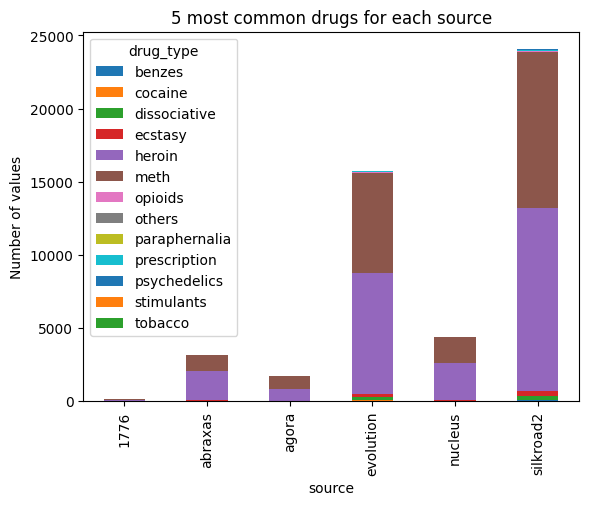

In [239]:
# we now add the column drug_type also to df, not just df_final, and call it df_types
df2 = df.dropna()
df_types = df2.copy()
df_types['drug_type'] = 'others'

# we iterate over the dictionary and assign the key to the rows that contain the corresponding values in product_title and product_description
for drug, synonyms in drug_synonyms.items():
    df_types.loc[df_types['product_title'].str.contains('|'.join(synonyms), case=False), 'drug_type'] = drug
    df_types.loc[df_types['product_description'].str.contains('|'.join(synonyms), case=False), 'drug_type'] = drug

# we plot the 5 most common drugs for each source in the dataset
df_types.groupby('source')['drug_type'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('5 most common drugs for each source')
plt.ylabel('Number of values')
plt.show()

#### 3.2.4. Sellers and cartels

In [240]:
# we not check the top sellers by units sold
# and print the top 10 sellers
df_final['seller'].value_counts().head(15)

seller
rc4me                   447
gotmilk                 429
freegenerics            421
ThreeKings              205
stefandl                197
HollandOnline           179
Meds2Buy                162
only                    159
technohippy             158
FREE SHOP               158
cerberus                152
Drugs4you               150
cornettos               149
theben                  148
online-cannabis-king    142
Name: count, dtype: int64

In [241]:
# let's print the average number of items sellers have listed
print(df_final['seller'].value_counts().mean())

# and the median
print(df_final['seller'].value_counts().median())

# and main statistics
print(df_final['seller'].value_counts().describe())


11.863700765089261
5.0
count    3529.000000
mean       11.863701
std        22.353538
min         1.000000
25%         2.000000
50%         5.000000
75%        13.000000
max       447.000000
Name: count, dtype: float64


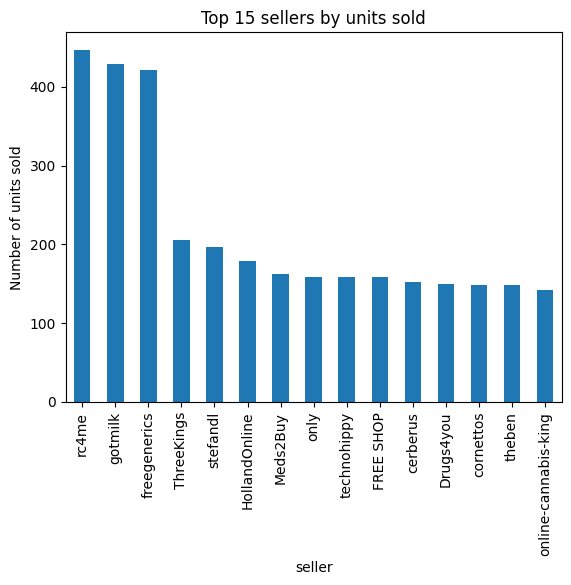

In [242]:
# plot the top 10 sellers
df_final['seller'].value_counts().head(15).plot(kind='bar')
plt.title('Top 15 sellers by units sold')
plt.ylabel('Number of units sold')
plt.show()


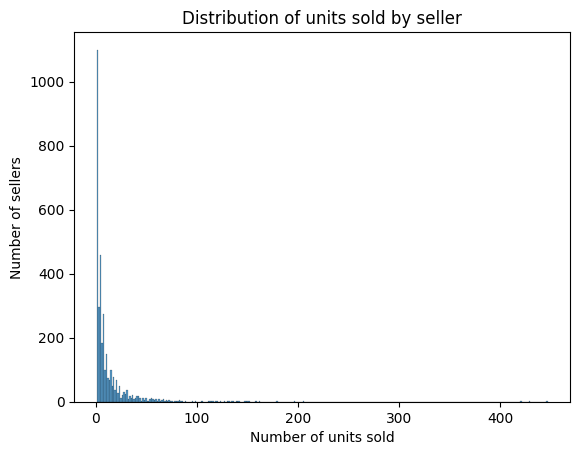

In [243]:
# now plot the distribution of units sold by seller
sns.histplot(df_final['seller'].value_counts())
plt.title('Distribution of units sold by seller')
plt.xlabel('Number of units sold')
plt.ylabel('Number of sellers')
plt.show()



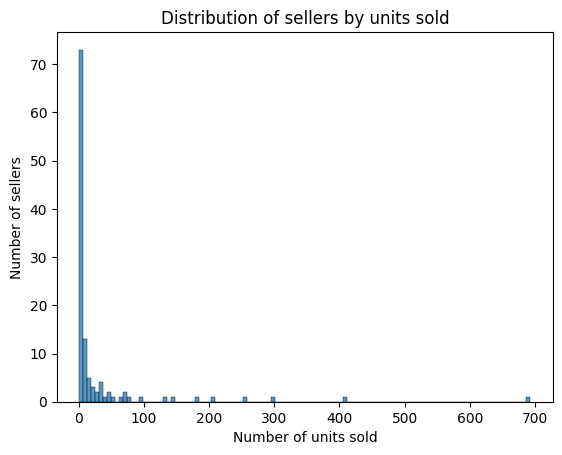

In [244]:
# now we plot the opposite histogram: the distribution of sellers by units sold
# this means that we plot the number of sellers that sold a certain number of units
# for example we plot the number of sellers that sold 1 unit, the number of sellers that sold 2 units, etc.
sns.histplot(df_final['seller'].value_counts().value_counts())
plt.title('Distribution of sellers by units sold')
plt.xlabel('Number of units sold')
plt.ylabel('Number of sellers')
plt.show()

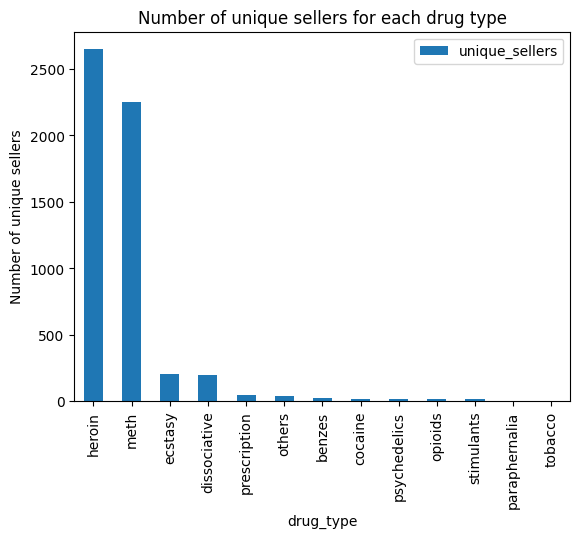

In [245]:
# now we find the drug type with the most sellers

# we group by drug type and seller, and count the number of rows
df_sellers = df_final.groupby(['drug_type', 'seller']).size().reset_index(name='counts')

# we group by drug type and count the number of unique sellers
df_sellers = df_sellers.groupby('drug_type')['seller'].nunique().reset_index(name='unique_sellers')

# we sort the values in descending order
df_sellers.sort_values(by='unique_sellers', ascending=False)

# we plot the number of unique sellers for each drug type
df_sellers.sort_values(by='unique_sellers', ascending=False).plot(x='drug_type', y='unique_sellers', kind='bar')
plt.title('Number of unique sellers for each drug type')
plt.ylabel('Number of unique sellers')
plt.show()

In [246]:
# the top sellers are
top_sellers = []
for i in df_final['seller'].value_counts().head(15).index:
    top_sellers.append(i)

# we compare the average prices of heroin and meth by top seller and compare them with the average prices in df_final
# we create a subset for heroin and one for meth
df_heroin = df_final[df_final['drug_type'] == 'heroin']

# we create a subset for meth
df_meth = df_final[df_final['drug_type'] == 'meth']

# we compare the average prices of heroin and meth by top seller
# and compare them with the average prices in df_final
for i in top_sellers:
    print(f'Average price for heroin by {i}: {df_heroin[df_heroin["seller"] == i]["price"].mean()}')
    print(f'Average price for meth by {i}: {df_meth[df_meth["seller"] == i]["price"].mean()}')
    print(f'Average price for heroin in df_final: {df_heroin["price"].mean()}')
    print(f'Average price for meth in df_final: {df_meth["price"].mean()}')
    print()

Average price for heroin by rc4me: 0.8401700478723405
Average price for meth by rc4me: 0.7260863235294118
Average price for heroin in df_final: 0.3343163658798167
Average price for meth in df_final: 0.3624727556525088

Average price for heroin by gotmilk: 0.45370919911504426
Average price for meth by gotmilk: 0.3231261323529412
Average price for heroin in df_final: 0.3343163658798167
Average price for meth in df_final: 0.3624727556525088

Average price for heroin by freegenerics: 0.16422
Average price for meth by freegenerics: 0.34273964646464644
Average price for heroin in df_final: 0.3343163658798167
Average price for meth in df_final: 0.3624727556525088

Average price for heroin by ThreeKings: 0.11270536363636365
Average price for meth by ThreeKings: 0.13660128448275863
Average price for heroin in df_final: 0.3343163658798167
Average price for meth in df_final: 0.3624727556525088

Average price for heroin by stefandl: 0.46736772727272735
Average price for meth by stefandl: 0.702745


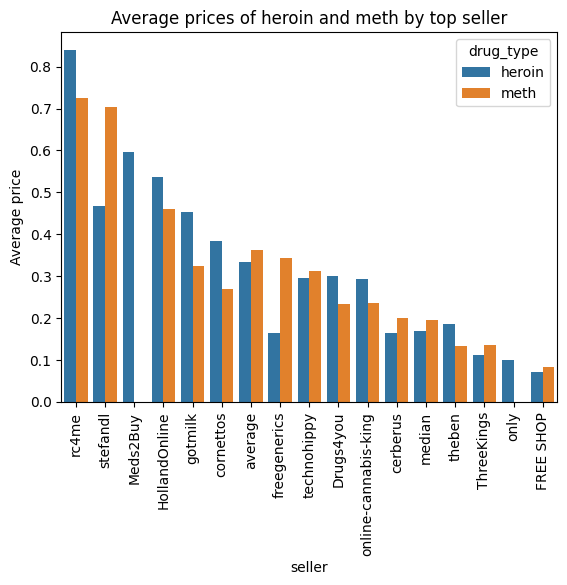

In [247]:
# we plot the average prices of heroin and meth by top seller and compare them with the average prices in df_final

# we create a dictionary to store the average prices of heroin and meth by top seller
average_prices = {'seller': [], 'drug_type': [], 'average_price': []}

# we iterate over the top sellers and calculate the average prices for heroin and meth

for i in top_sellers:
    average_prices['seller'].append(i)
    average_prices['drug_type'].append('heroin')
    average_prices['average_price'].append(df_heroin[df_heroin['seller'] == i]['price'].mean())
    average_prices['seller'].append(i)
    average_prices['drug_type'].append('meth')
    average_prices['average_price'].append(df_meth[df_meth['seller'] == i]['price'].mean())

# we add a column to df_average_prices that contains the average prices in df_final
average_prices['seller'].append('average')
average_prices['drug_type'].append('heroin')
average_prices['average_price'].append(df_heroin['price'].mean())
average_prices['seller'].append('average')
average_prices['drug_type'].append('meth')
average_prices['average_price'].append(df_meth['price'].mean())

# we add a column that contains the median price in df_final
average_prices['seller'].append('median')
average_prices['drug_type'].append('heroin')
average_prices['average_price'].append(df_heroin['price'].median())
average_prices['seller'].append('median')
average_prices['drug_type'].append('meth')
average_prices['average_price'].append(df_meth['price'].median())

# we create a dataframe from the dictionary
df_average_prices = pd.DataFrame(average_prices)

# we order the dataframe by average price
df_average_prices = df_average_prices.sort_values(by='average_price', ascending=False)

# we plot the average prices of heroin and meth by top seller
# rotating their labels 90 degrees
sns.barplot(x='seller', y='average_price', hue='drug_type', data=df_average_prices)
plt.xticks(rotation=90)
plt.title('Average prices of heroin and meth by top seller')
plt.ylabel('Average price')
plt.show()

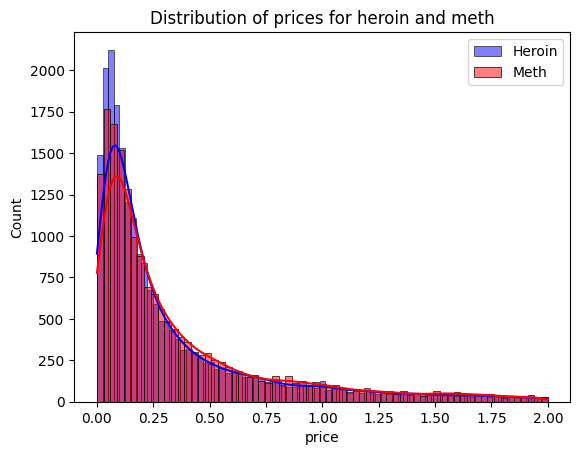

In [248]:
# we plot the distribution of prices for heroin and meth
sns.histplot(df_heroin['price'], kde=True, color='blue', label='Heroin')
sns.histplot(df_meth['price'], kde=True, color='red', label='Meth')
plt.title('Distribution of prices for heroin and meth')
plt.legend()
plt.show()

In [249]:
# to gain more insights, we print the seller with minimum, maximum, average and median units sold (times they're present in the seller column)
print(f'The fewest units sold is: {df_final["seller"].value_counts().min()}')
print(f'The most units sold is: {df_final["seller"].value_counts().max()}')
print(f'The average units sold is: {df_final["seller"].value_counts().mean()}')
print(f'The median units sold is: {df_final["seller"].value_counts().median()}')

# how many sellers sold just 1 unit
print((df_final['seller'].value_counts() == 1).sum())
# how many sellers sold less than the average units sold (12)
print((df_final['seller'].value_counts() < df_final['seller'].value_counts().mean()).sum())
# how many sellers sold more than the average units sold (12)
print((df_final['seller'].value_counts() > df_final['seller'].value_counts().mean()).sum())

The fewest units sold is: 1
The most units sold is: 447
The average units sold is: 11.863700765089261
The median units sold is: 5.0
693
2558
971


#### 3.2.5. Shipping origins and destinations

The number of unique values in ship_from is 153 and in ship_to is 320.
ship_from
United States     10841
United Kingdom     6017
Germany            4239
Netherlands        4186
Australia          3068
Canada             2691
Worldwide          2673
Undeclared         2244
China              2086
India              1158
Name: count, dtype: int64


<Axes: xlabel='ship_from'>

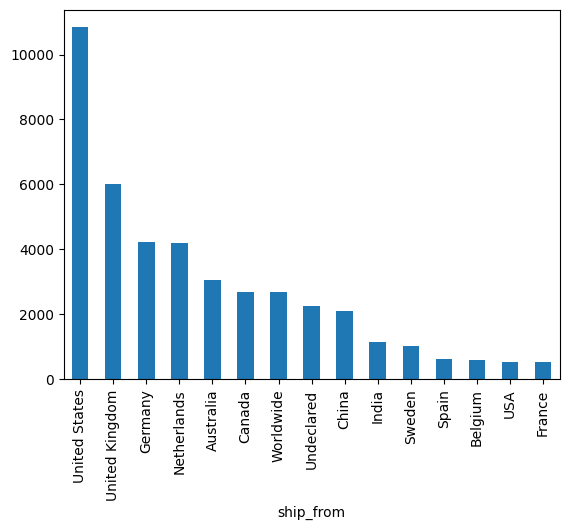

In [250]:
# we print the number of unique values in ship_from and ship_to
print(f'The number of unique values in ship_from is {df_wmv["ship_from"].nunique()} and in ship_to is {df_wmv["ship_to"].nunique()}.')

# we print the 10 most common countries in ship_from
print(df_wmv['ship_from'].value_counts().head(10))

# we plot the 15 most common countries in ship_from
df_wmv['ship_from'].value_counts().head(15).plot(kind='bar')


In [251]:
# we print the 10 most common countries in ship_to
print(df_wmv['ship_to'].value_counts().head(10))

# we print the 7th most common country in ship_to
print(df_wmv['ship_to'].value_counts().index[6])

# we substitute its value with EU
df_wmv['ship_to'] = df_wmv['ship_to'].replace(df_wmv['ship_to'].value_counts().index[6], 'EU')

ship_to
Worldwide                                                                                                                                                                                                                                                                    20672
United States                                                                                                                                                                                                                                                                 8397
Australia                                                                                                                                                                                                                                                                     2926
United Kingdom                                                                                                                                                         

<Axes: xlabel='ship_to'>

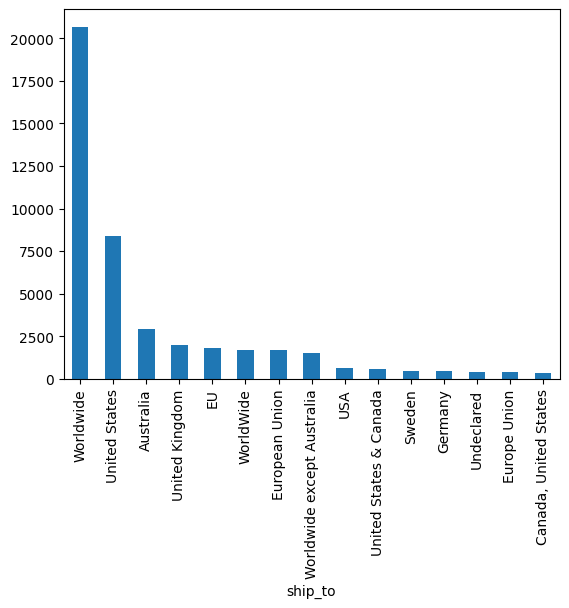

In [252]:
# we plot the 15 most common countries in ship_to
df_wmv['ship_to'].value_counts().head(15).plot(kind='bar')


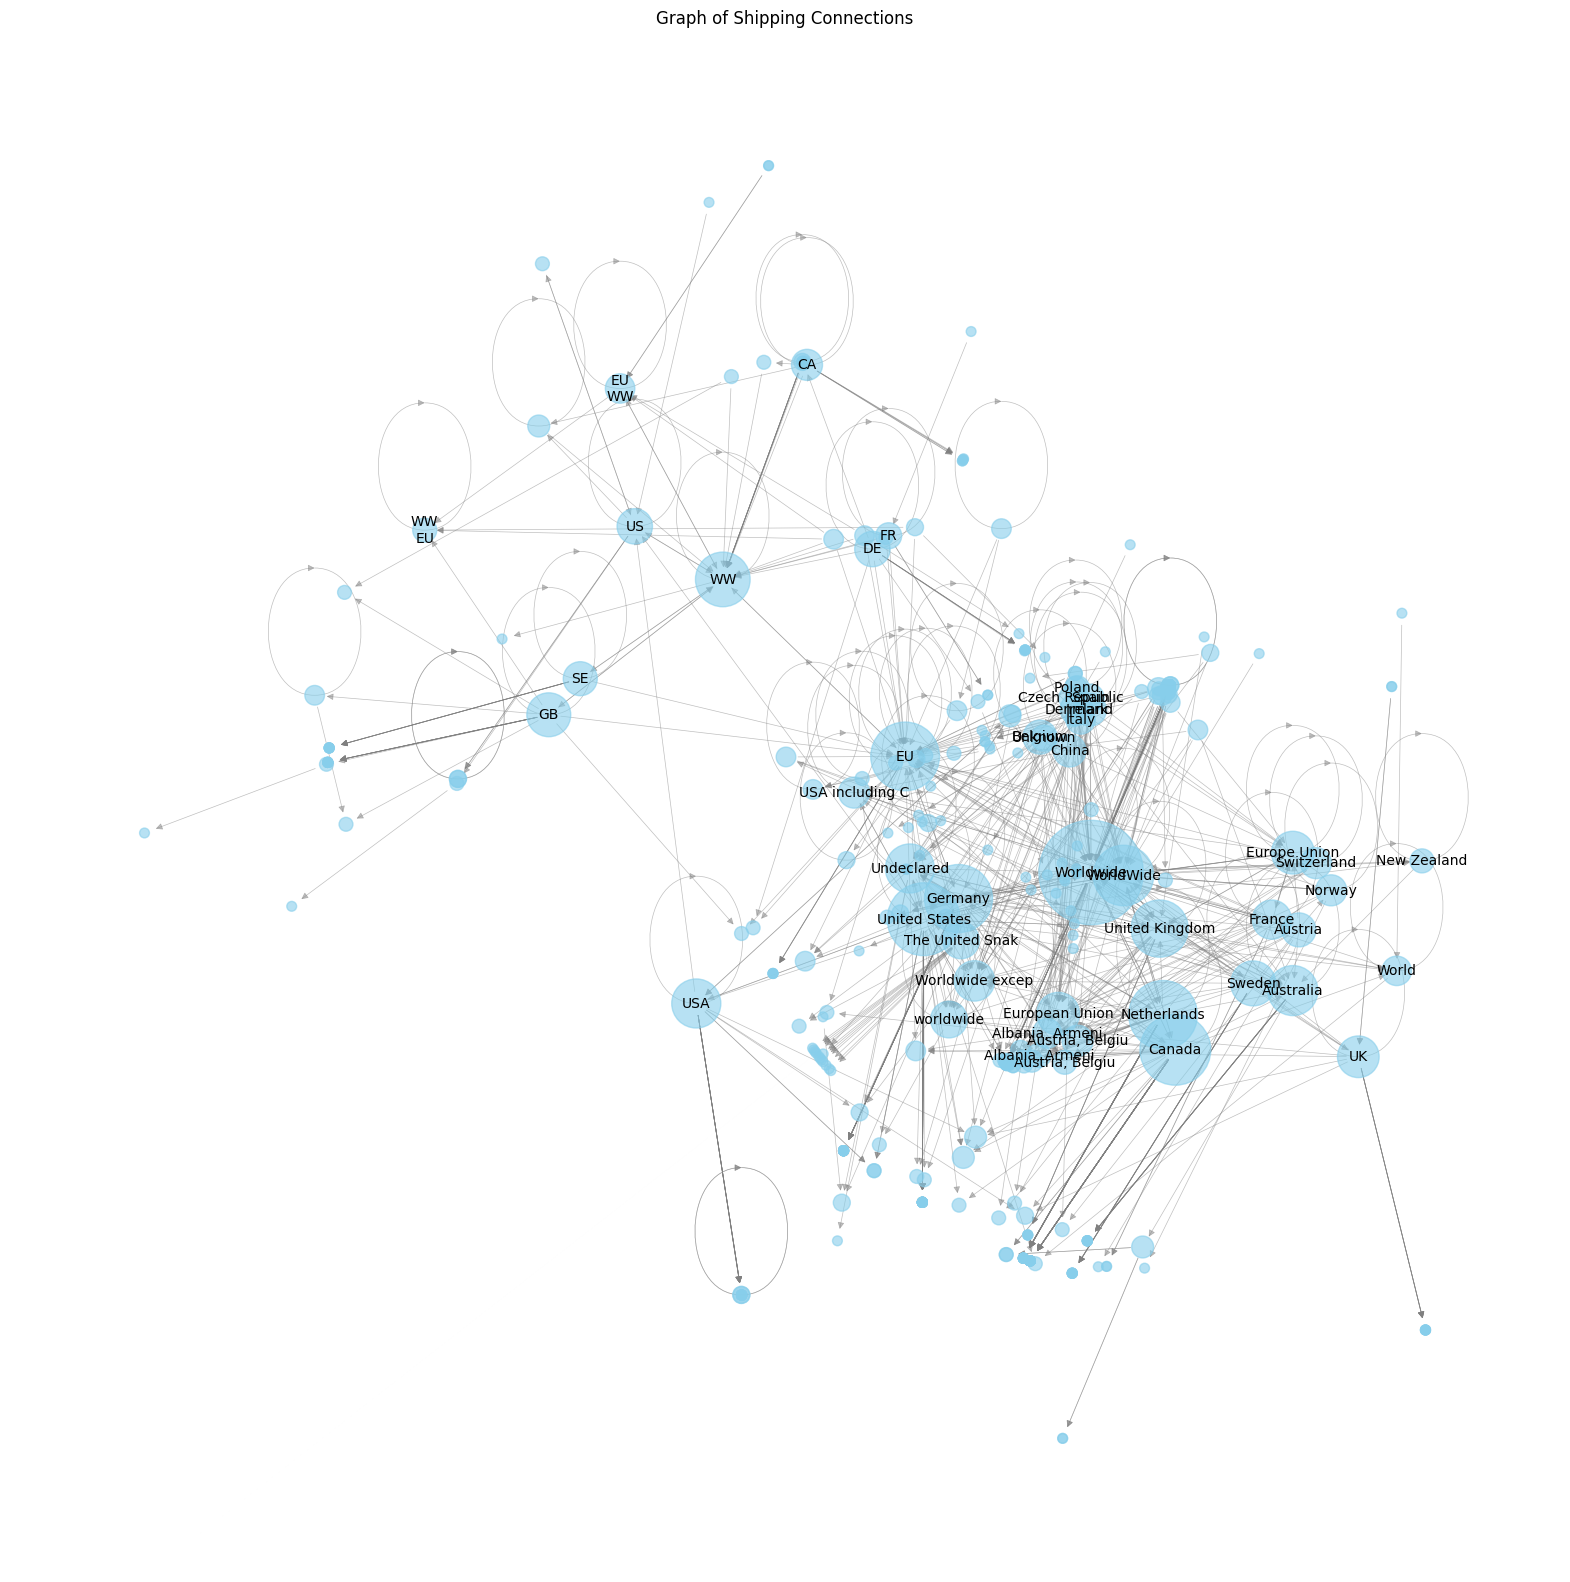

In [253]:
from matplotlib.colors import to_rgba

# Create the directed graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(df_wmv['ship_from'].unique())
G.add_nodes_from(df_wmv['ship_to'].unique())

# Add edges
for i in range(df_wmv.shape[0]):
    G.add_edge(df_wmv['ship_from'].iloc[i], df_wmv['ship_to'].iloc[i])

# Setup plot
plt.figure(figsize=(20, 20))
pos = nx.kamada_kawai_layout(G)  # This layout might handle dense graphs better

# Draw nodes
node_size = [G.degree(n) * 50 for n in G]  # Scale node sizes by degree
nx.draw_networkx_nodes(G, pos, node_color='skyblue', alpha=0.6, node_size=node_size)

# Draw edges
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=10, edge_color='gray', width=0.5, alpha=0.5)

# Draw labels for significant nodes only

large_nodes = [n for n in G if G.degree(n) > 5]
labels = {n: n[:15] for n in large_nodes} # limit the label size to 15 characters
nx.draw_networkx_labels(G, pos, labels, font_size=10)

# Set plot title
plt.title('Graph of Shipping Connections')
plt.axis('off')  # Turn off the axis
plt.show()


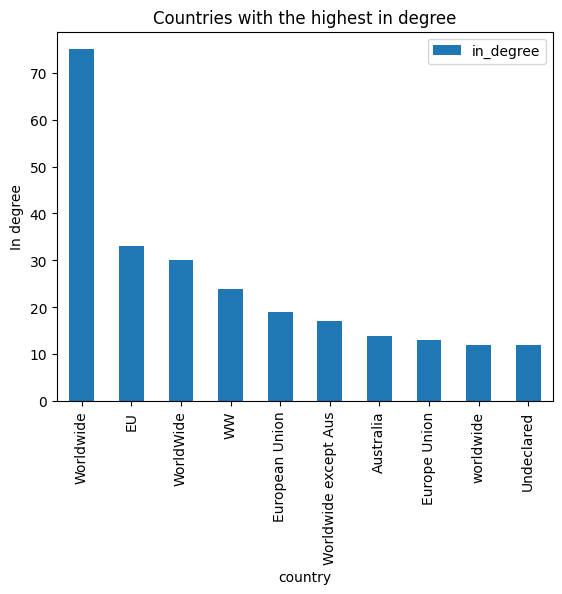

In [254]:
# we compute in degree and outdegree for each country
# in degree defined as number of times the country appears in ship_to,
# out degree defined as number of times the country appears in ship_from
in_degree = dict(G.in_degree())
out_degree = dict(G.out_degree())

# we plot the countries with the highest in degree
# limit label length to 20 characters
df_in_degree = pd.DataFrame(in_degree.items(), columns=['country', 'in_degree'])
df_in_degree = df_in_degree.sort_values(by='in_degree', ascending=False)
df_in_degree = df_in_degree.head(10)
df_in_degree['country'] = df_in_degree['country'].apply(lambda x: x[:20])
df_in_degree.plot(x='country', y='in_degree', kind='bar')
plt.title('Countries with the highest in degree')
plt.ylabel('In degree')
plt.show()

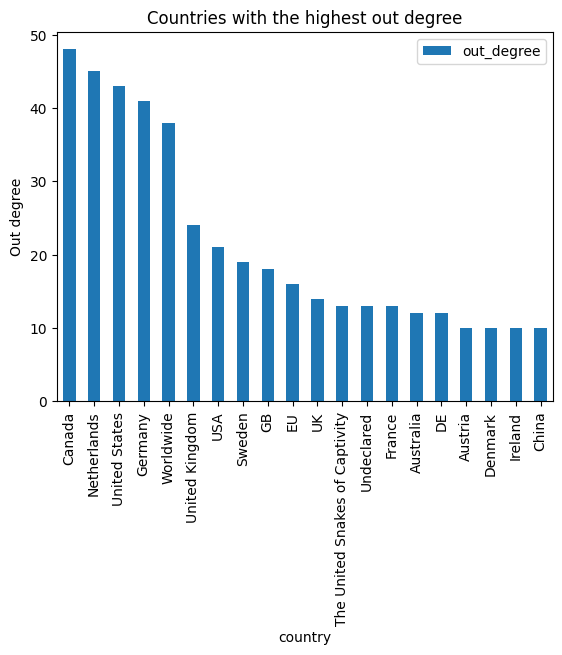

In [255]:
# we plot the countries with the highest out degree
df_out_degree = pd.DataFrame(out_degree.items(), columns=['country', 'out_degree'])
df_out_degree.sort_values(by='out_degree', ascending=False).head(20).plot(x='country', y='out_degree', kind='bar')
plt.title('Countries with the highest out degree')
plt.ylabel('Out degree')
plt.show()

## 4. NLP Analysis

In [256]:
# NLP Analysis of the 'product_title' column
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

#Download the NLTK resources 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


False

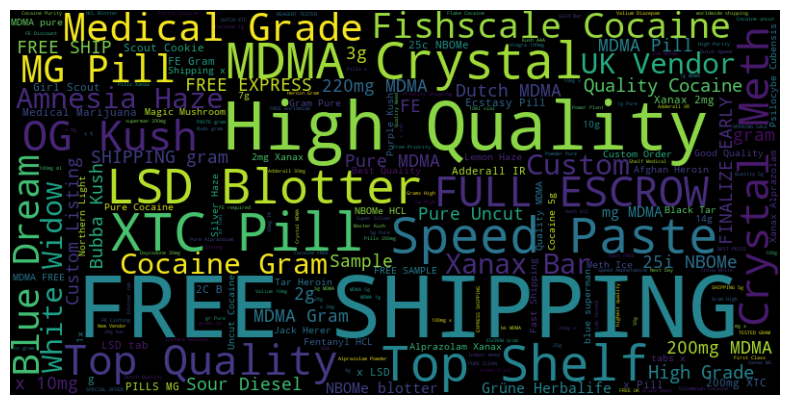

In [257]:
# Create a list of stopwords
stop_words = set(stopwords.words('english'))

# Create a WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a Porter Stemmer
stemmer = PorterStemmer()

# Tokenize the 'product_title' column
# first convert into string
df['product_title'] = df['product_title'].astype(str)
df['product_title_tokens'] = df['product_title'].apply(word_tokenize)
# TypeError: expected string or bytes-like object


# Remove stopwords from the 'product_title' column
df['product_title_tokens'] = df['product_title_tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Lemmatize the 'product_title' column
df['product_title_tokens'] = df['product_title_tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Stem the 'product_title' column
df['product_title_tokens'] = df['product_title_tokens'].apply(lambda x: [stemmer.stem(word) for word in x])

# Create a WordCloud of the 'product_title' column
text = ' '.join(df['product_title'])
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

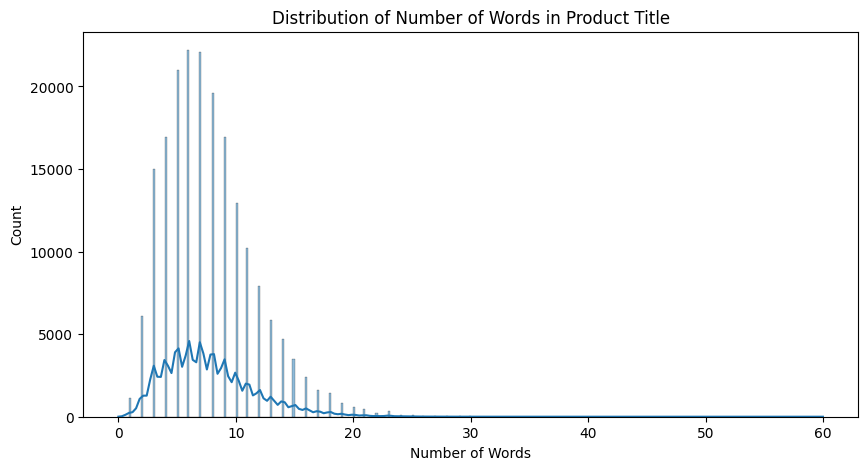

In [258]:
# Visualize the distribution of the 'product_title' column
plt.figure(figsize=(10, 5))
sns.histplot(df['product_title_tokens'].apply(len), kde=True)
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.title('Distribution of Number of Words in Product Title')
plt.show()

In [259]:
# print more statistics on the number and type of words in product titles
# Create a new column with the number of words in the 'product_title' column
df['num_words'] = df['product_title_tokens'].apply(len)

# Display the average number of words in the 'product_title' column
print('Average Number of Words in Product Title:', df['num_words'].mean())

# Display the maximum number of words in the 'product_title' column
print('Maximum Number of Words in Product Title:', df['num_words'].max())

# Display the minimum number of words in the 'product_title' column
print('Minimum Number of Words in Product Title:', df['num_words'].min())

# Display the most common words in the 'product_title' column
# exclude special characters and stopwords

# Create a list of special characters
special_chars = ['!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '-', '_', '+', '=', '{', '}', '[', ']', '|', '\\', ':', ';', '"', "'", '<', '>', ',', '.', '?', '/']

# Create a list of words without special characters
df['product_title_tokens'] = df['product_title_tokens'].apply(lambda x: [word for word in x if word not in special_chars])

words = [word for sublist in df['product_title_tokens'] for word in sublist]
word_freq = nltk.FreqDist(words)
print('Most Common Words in Product Title:', word_freq.most_common(50))

Average Number of Words in Product Title: 7.774529015136319
Maximum Number of Words in Product Title: 60
Minimum Number of Words in Product Title: 0
Most Common Words in Product Title: [('gram', 24463), ('x', 19274), ('mdma', 16990), ('free', 14806), ('ship', 14218), ('1', 13852), ('pill', 13004), ('qualiti', 12674), ('pure', 11958), ('10', 11147), ('cocain', 10398), ('1g', 9257), ('100', 8944), ('crystal', 8008), ('mg', 7792), ('high', 7424), ('fe', 7387), ('5', 7226), ('kush', 6542), ('lsd', 6506), ('grade', 6478), ('tab', 6313), ('50', 5952), ('blotter', 5749), ('xtc', 5410), ('xanax', 5400), ('white', 5288), ('uk', 5125), ('top', 5056), ('--', 5017), ('weed', 5003), ('oz', 4970), ('heroin', 4871), ('hash', 4807), ('2', 4681), ('10mg', 4650), ('blue', 4615), ('5g', 4587), ('indoor', 4582), ('speed', 4543), ('dutch', 4385), ('10g', 4164), ('gr', 4102), ('3.5g', 4099), ('uncut', 3982), ('haze', 3950), ('escrow', 3918), ('7g', 3883), ("'s", 3753), ('powder', 3674)]


In [260]:
# Classification of fraudolent listings using NLP insights
# we classify listings as fraudulent when there are exclamation marks and misspelled words in the product title, such as qualiti

# Create a new column with the number of exclamation marks in the 'product_title' column
df['num_exclamation_marks'] = df['product_title'].apply(lambda x: x.count('!'))

# Create a new column with the number of misspelled words in the 'product_title' column
df['num_misspelled_words'] = df['product_title_tokens'].apply(lambda x: sum([1 for word in x if 'qualiti' in word]))

# Create a new column to classify listings as fraudulent or not
df['is_fraudulent'] = (df['num_exclamation_marks'] > 0) | (df['num_misspelled_words'] > 0)

# Display the count of fraudulent and non-fraudulent listings
print(df['is_fraudulent'].value_counts())

# Display the percentage of fraudulent and non-fraudulent listings
print(df['is_fraudulent'].value_counts(normalize=True))

# True means that the listing is fraudulent, while False means that the listing is not fraudulent.

is_fraudulent
False    168778
True      25655
Name: count, dtype: int64
is_fraudulent
False    0.868052
True     0.131948
Name: proportion, dtype: float64


## 5. Price Prediction

In [261]:
# Count offers per seller
offers_per_seller = df_final.groupby('seller').size()

# Calculate the median offers
median_offers = offers_per_seller.median()

# Calculate offers to median for each seller
offers_to_median = offers_per_seller / median_offers

# Calculate Market Polarization
market_polarization = offers_to_median.sum() / offers_per_seller.sum() * 100
print(f"Market Polarization: {market_polarization:.2f}%")

# Count unique items (product_titles) per seller for the Possible Scam metric
items_per_seller = df.groupby('seller')['product_title'].nunique()

# Count sellers with 1 or 2 items
scam_vendors_count = items_per_seller[items_per_seller <= 2].count()

# Total number of sellers
total_sellers = df_final['seller'].nunique()

# Calculate Possible Scam ratio
possible_scam_ratio = (scam_vendors_count / total_sellers) * 100

print(f"Possible Scam Ratio: {possible_scam_ratio:.2f}%")

Market Polarization: 20.00%
Possible Scam Ratio: 36.44%


In [263]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Encode categorical data
label_encoder = LabelEncoder()
df_final_2 = df_final.copy()

# drop column currency_name
df_final_2.drop('currency_name', axis=1, inplace=True)
df_final_2.drop('drug_type', axis=1, inplace=True)
categorical_columns = ['product_title', 'product_description', 'ship_from', 'ship_to', 'seller', 'source']  # update as necessary
for column in categorical_columns:
    df_final_2[column] = label_encoder.fit_transform(df_final_2[column].astype(str))

# Feature selection: Select relevant columns
features = df_final_2.drop('price', axis=1)  # Assuming 'price' is the target and all other columns are features
target = df_final_2['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

# Save the model predictions
df_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df_predictions.to_csv('model_predictions.csv', index=False)

# Display a sample of predictions
print("Sample predictions:")
print(df_predictions.head())

Mean Absolute Error: 0.00968347168402791
Sample predictions:
          Actual  Predicted
141376  0.077800   0.077800
186648  0.294000   0.294005
146197  0.400000   0.400000
170258  1.601158   1.601273
135465  0.220800   0.220796
